In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from neuron import Neuron
from network_with_inh import NetworkWithInh

In [3]:
def adjust_train(train, vmin, vrescale, offset):
    return [(x - vmin) / vrescale + offset for x in train]

In [4]:
N = 50
GC = 100
DENSITY = .3
TMAX = 400
T_REF = .1
WNOISE = 0

In [5]:
# define edges
edges = []        
for i in range(N):
    for j in range(i+1, N):
        if np.random.rand() < DENSITY and (i, j) not in edges:
            edges.append((i, j))

## tune intervals

In [6]:
def run_sim(tau_inh=5, a_inh=100, interval=20):

    # initiate network
    ntwk = NetworkWithInh(num=N, 
                          edges=edges, 
                          gc=GC, 
                          tmax=TMAX, 
                          pacemakers=range(N), 
                          conn_type='gap_junction', 
                          wnoise=WNOISE,
                          tau_inh=tau_inh,
                          a_inh=a_inh,
                          interval=interval)

    # run the simulation
    ntwk.run()

    # display result
    ntwk.disp(figsize=(15, 15), style='spike')

100%|█████████████████████████████████████████| 39999/39999 [00:24<00:00, 1623.98it/s]


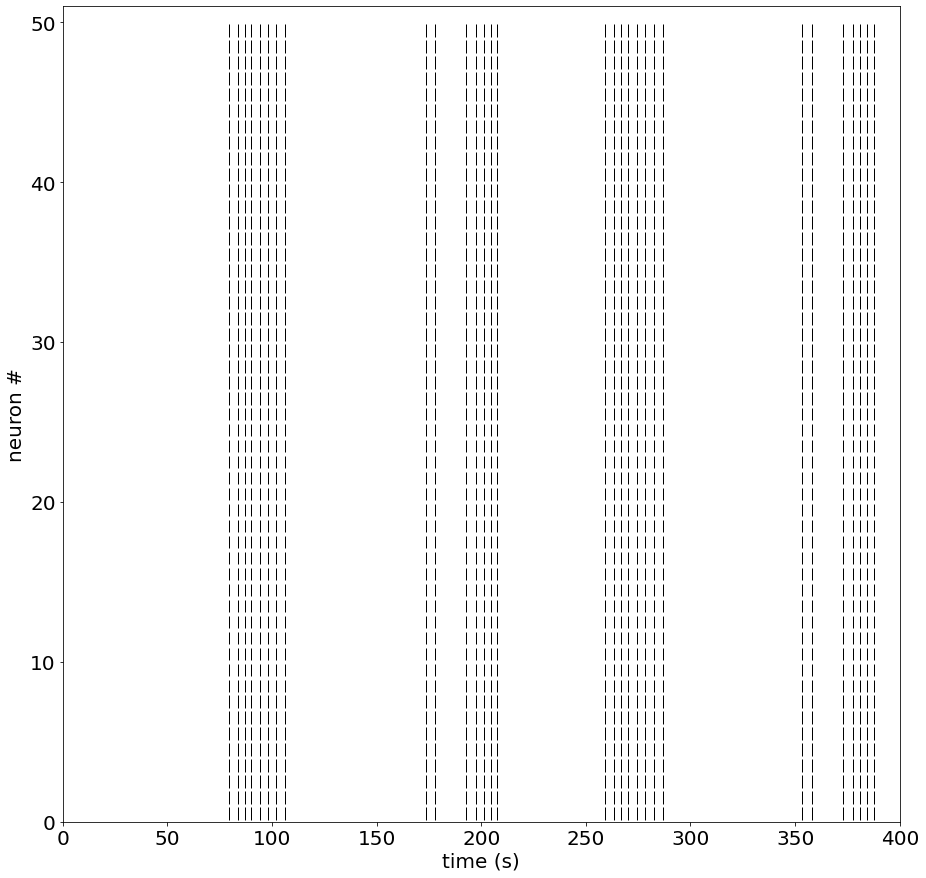

In [20]:
run_sim(interval=30)

100%|█████████████████████████████████████████| 39999/39999 [00:25<00:00, 1539.69it/s]


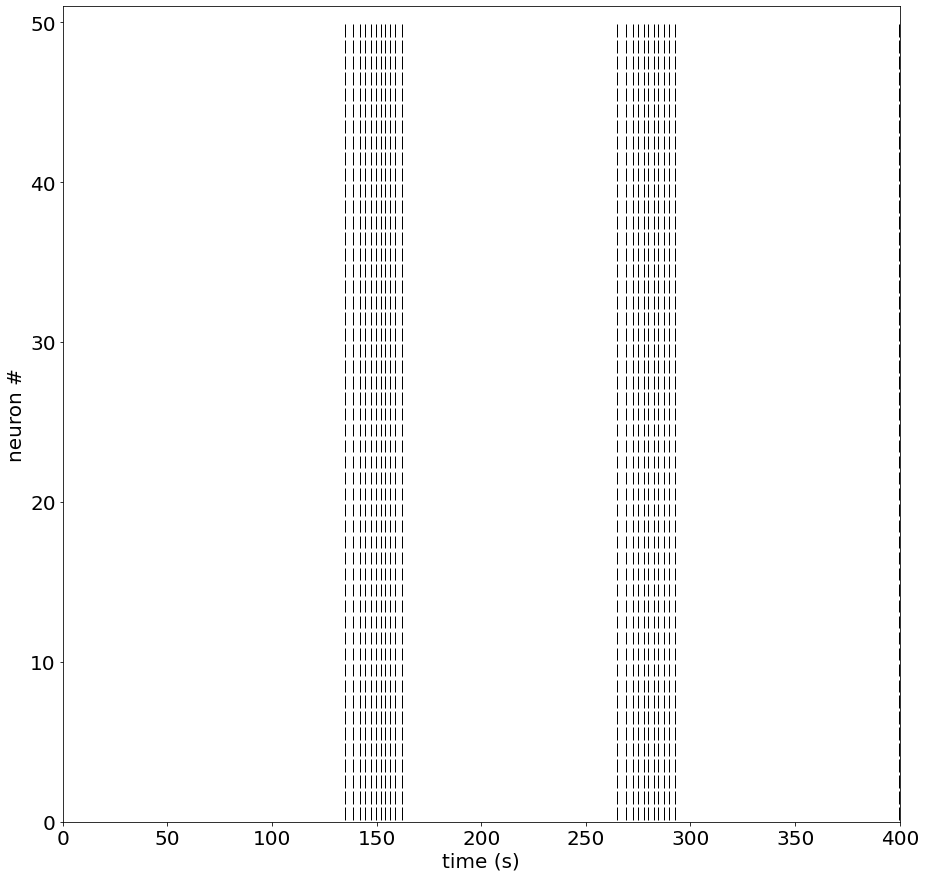

In [9]:
run_sim(interval=5)

100%|█████████████████████████████████████████| 39999/39999 [00:29<00:00, 1369.15it/s]


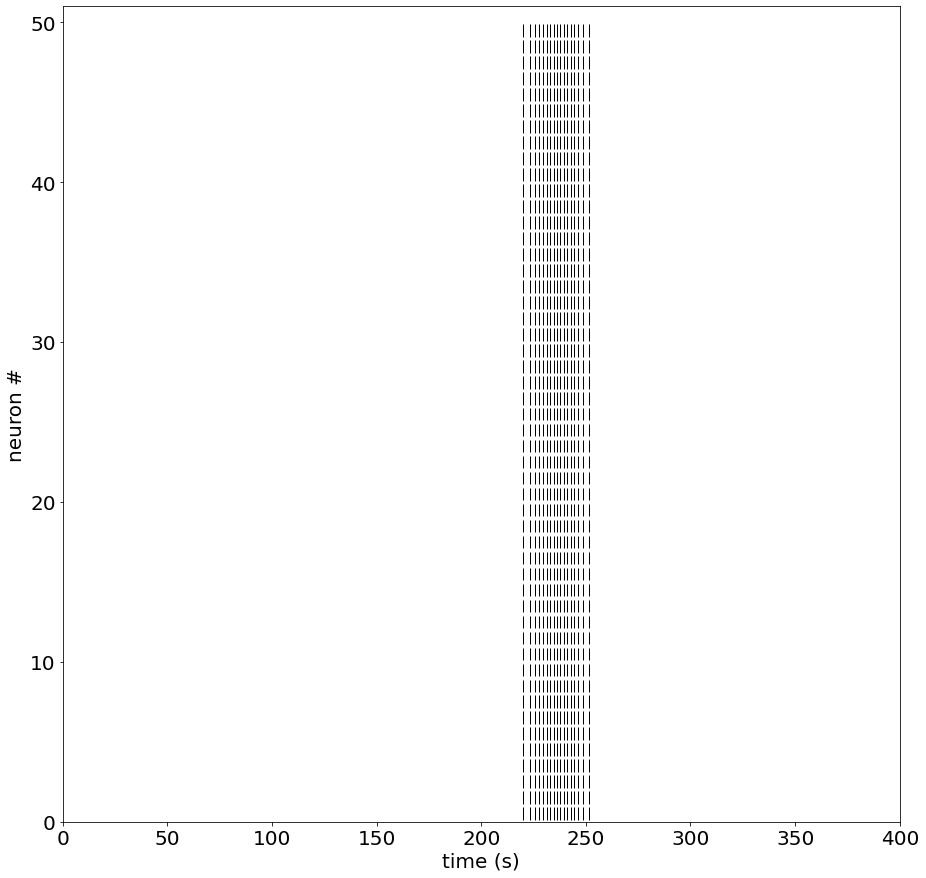

In [10]:
run_sim(interval=2)

## test lower sensitivity

100%|████████████████████████████████████████| 119999/119999 [02:50<00:00, 702.38it/s]


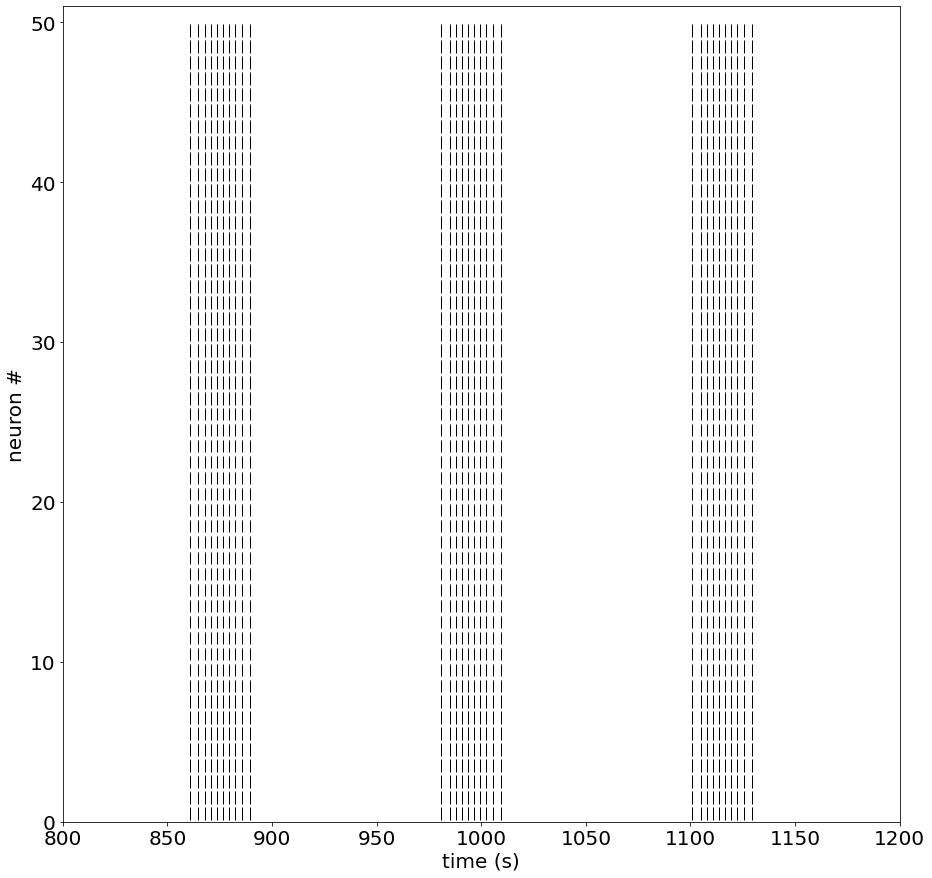

In [24]:
# initiate network
ntwk = NetworkWithInh(num=N, 
                      edges=edges, 
                      gc=GC, 
                      tmax=3*TMAX, 
                      pacemakers=range(N), 
                      conn_type='gap_junction', 
                      wnoise=WNOISE,
                      tau_inh=5,
                      a_inh=100,
                      interval=1)

for neuron in ntwk.neurons:
    neuron.s = .0017

# run the simulation
ntwk.run()

# display result
ntwk.disp(figsize=(15, 15), style='spike', xlim=[2*TMAX, 3*TMAX])

## tune inhibition density

In [36]:
def run_sim2(ratio):
    
    # define inhibited neurons
    stim_nrns = set(np.random.choice(range(N), int(N*ratio)))
    stim = {}
    for t in np.arange(0, TMAX, 0.01):
        stim[t] = stim_nrns
    
    # initiate network
    ntwk = NetworkWithInh(num=N, 
                          edges=edges, 
                          gc=GC, 
                          tmax=TMAX, 
                          pacemakers=range(N), 
                          conn_type='gap_junction', 
                          wnoise=WNOISE,
                          tau_inh=5,
                          a_inh=100,
                          interval=2)

    # run the simulation
    ntwk.run(stim=stim)

    # display result
    ntwk.disp(figsize=(15, 15), style='spike')

100%|██████████████████████████████████████████| 39999/39999 [05:33<00:00, 120.10it/s]


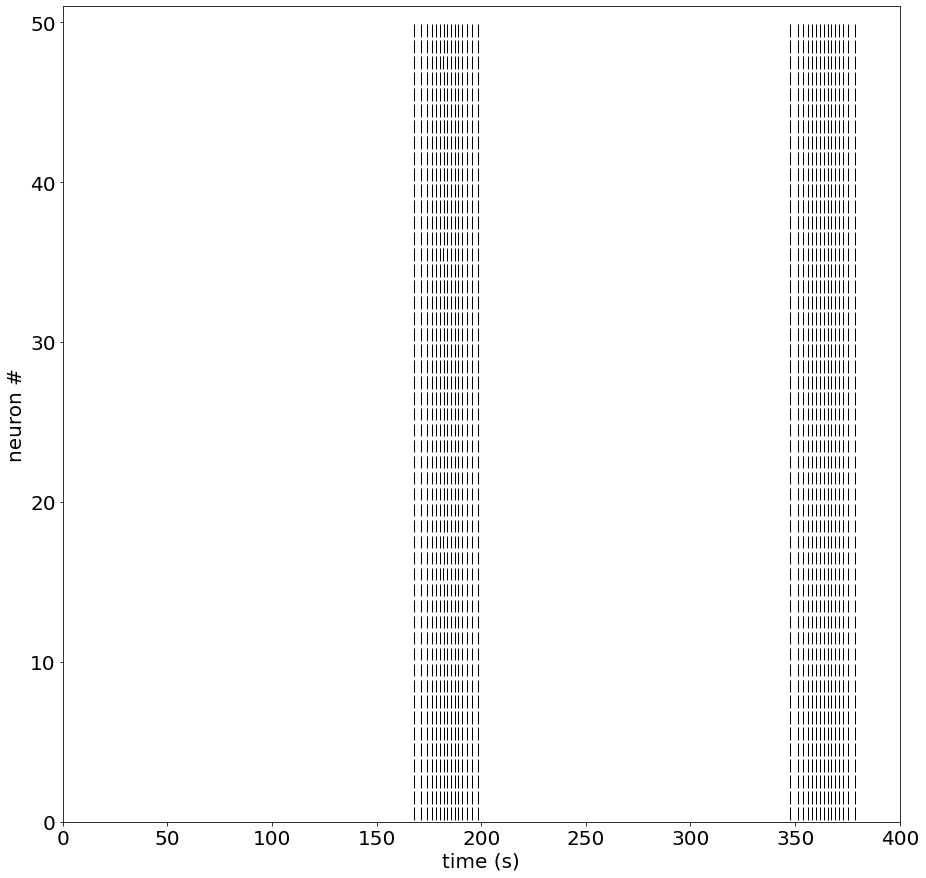

In [37]:
run_sim2(ratio=1)

100%|██████████████████████████████████████████| 39999/39999 [05:36<00:00, 118.91it/s]


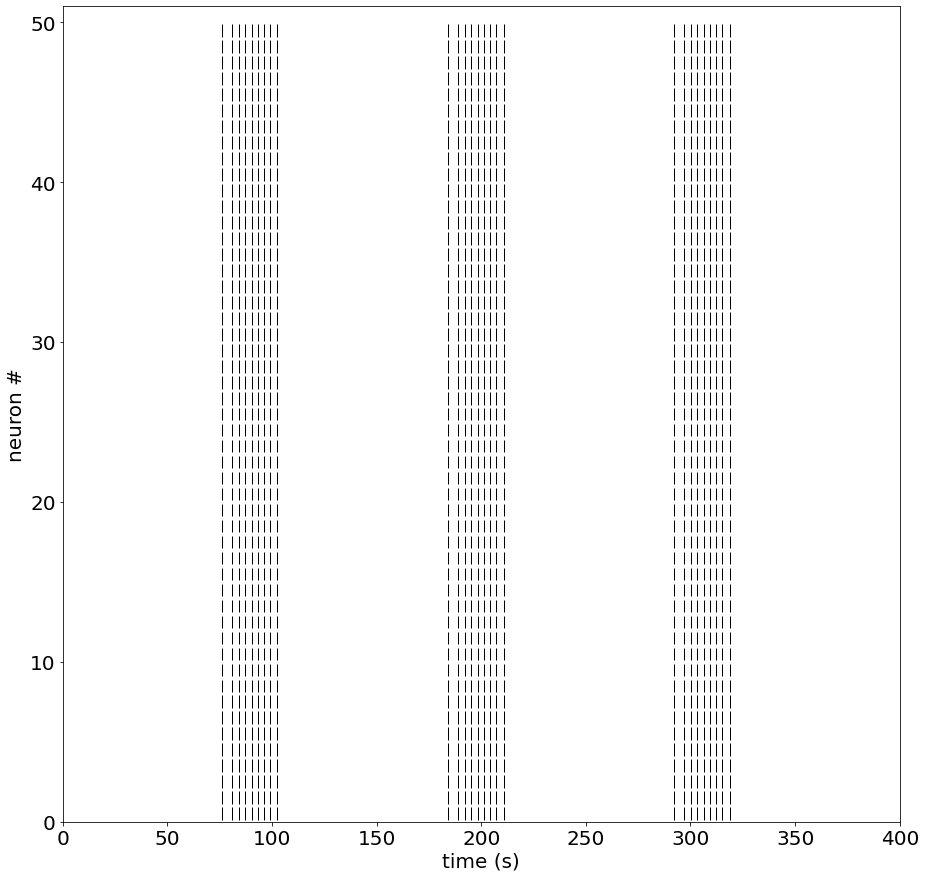

In [40]:
run_sim2(ratio=0)